In [18]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In this example, we will show how the sense of agency and the Bayesian decision theory can be used to explain how we chose the assistance level in a task. 
We have some basic assumptions:
* Task performance $y$ is from 0 to 1: [0, 1]
* Participants have a prior belief about their performance: $p(y)$
* Therefore, we can consider the self-efficacy involve how good, i.e., the mean of the prior belief, and how confident, i.e., the variance of the prior belief, participants are.
* If a sample of performance $y_i$ falls below the prior belief, the participant will more likely consider it's from his/her own performance action. Otherwise, the participant will more likely consider it's from something else, e.g., the assistance.
* We use $p(I=self)$ to indicate the belief that the performance is from the participant's own action, and $p(I=other)$ to indicate the belief that the performance is from something else.
* We can formalize the posterior belief of the performance is from the participant's own action is:
$$
p(I=self) = \frac{p(y_i|I=self)p(I=self)}{p(y_i|I=self)p(I=self) + p(y_i|I=other)p(I=other)}
$$
* Now we can consider utility based on the Bayesian decision theory 
* We can assume that participants receive more utility when they perform the task by themselves. They are less intrinsically rewarded when they consider the performance is from something else.
* Therefore, 
$$
U_{self} = p(I=self) \times k_{self} \times y_i \\
U_{other} = p(I=other) \times k_{other} \times y_i \\ 
U = U_{self} + U_{other}
$$
* In a simple case, we can assume that $k_{self} = 1$ and $k_{other} = 0$.
* Therefore,
$$
U = p(I=self) \times y_i
$$
* We can consider assistant level as a continuous variable, i.e., $a \in [0, 1]$
* With the assistance, participants can perform better, i.e., $E[Y|a]=E[Y] + a$
* Therefore, participants' objective is to maximize the utility by choosing the assistance level, i.e.,
$$
a^* = \arg \max_a U(E[Y] + a)
$$



# Now we can start the toy example

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [20]:
O = np.linspace(0, 1, 100)

We can first set the prior.
Here we assume the prior p(I=self)=p(I=others)=0.5, i.e., the participant is equally likely to believe that the performance is from his/her own action or from something else.

In [21]:
prior_self = 0.5
prior_others = 0.5

Let's consider the likelihood $p(Y|I=self)$ is a beta distribution with parameters $\alpha$ and $\beta$.
This means the participant has a certain mean and variance of the prior belief about his/her performance.

Similar to our previous implementation, we simply assume the likelihood $p(Y|I=others)$ is a uniform distribution [0, 1].

Text(0, 0.5, 'Probability density')

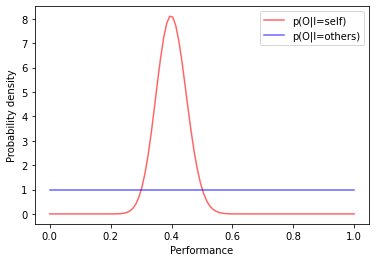

In [22]:
alpha = 40
beta = 60

# plot beta pdf
likelihood_self = stats.beta.pdf(O, alpha, beta)
likelihood_others = stats.uniform.pdf(O)
plt.plot(O, likelihood_self, 'r-', alpha=0.6, label='p(O|I=self)')
plt.plot(O, likelihood_others, 'b-', alpha=0.6, label='p(O|I=others)')
plt.legend()
plt.xlabel('Performance')
plt.ylabel('Probability density')



We also simply assume the prior belief $p(I=self)=p(I=other)=0.5$.
Therefore, the posterior belief 
$$
p(I=self|Y) = \frac{p(Y|I=self)p(I=self)}{p(Y|I=self)p(I=self) + p(Y|I=other)p(I=other)} = \frac{p(Y|I=self)}{p(Y|I=self) + p(Y|I=other)}
$$

Text(0, 0.5, 'Probability')

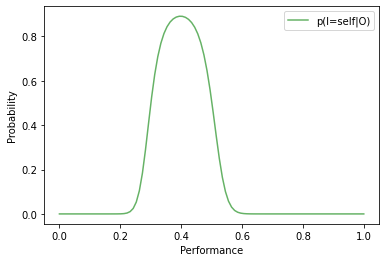

In [24]:
posterior_self = likelihood_self * prior_self / (likelihood_self * prior_self + likelihood_others * prior_others)
posterior_others = 1 - posterior_self
plt.plot(O, posterior_self, 'g-', alpha=0.6, label='p(I=self|O)')
plt.legend()
plt.xlabel('Performance')
plt.ylabel('Probability')

Now, we consider the utility function 
$$
U(O) = p(I=self) \times \gamma_{self} \times O + p(I=others) \times \gamma_{others} \times O
$$
where $\gamma_{self}$ and $\gamma_{others}$ are the coefficients of the utility function, and $O$ is the outcome, i.e., the performance.

Here, we assume that $\gamma_{self} = 1$ and $\gamma_{others} = 0$.

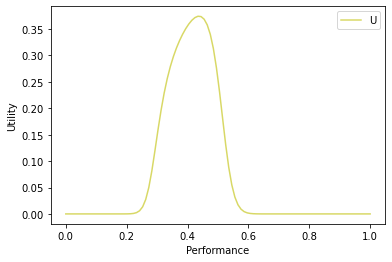

In [27]:
gamma_self = 1
gamma_others = 0

U = posterior_self * gamma_self * O + posterior_others * gamma_others * O
plt.plot(O, U, 'y-', alpha=0.6, label='U')
plt.legend()
plt.xlabel('Performance')
plt.ylabel('Utility')
plt.show()

Participants' objective is to maximize the utility by choosing the assistance level, i.e.,
$$
a^* = \arg \max_a U(E[Y] + a)
$$

Text(0.5, 0, 'Performance')

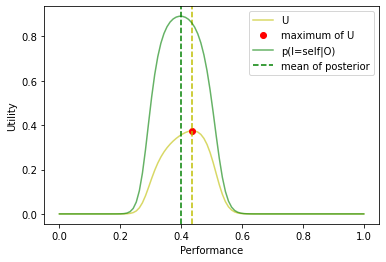

In [40]:
# find maximum of U
idx = np.argmax(U)
plt.plot(O, U, 'y-', alpha=0.6, label='U')
plt.plot(O[idx], U[idx], 'ro', label='maximum of U')
plt.axvline(O[idx], color='y', linestyle='--')
plt.legend()
plt.xlabel('Performance')
plt.ylabel('Utility')

# plot mean of posterior with vertical dash line
mean = alpha / (alpha + beta)
plt.plot(O, posterior_self, 'g-', alpha=0.6, label='p(I=self|O)')
plt.axvline(mean, color='g', linestyle='--', label='mean of posterior')
plt.legend()
plt.xlabel('Performance')



